In [23]:
import numpy as np                               #basically an array
import pandas as pd                              #reading and analyze csv
import matplotlib.pyplot as plt                  #data visualisation
import cv2                                       #comp. vision, image processing, uses numpy as images are 2D array(matrices)
import tensorflow as tf                          #creating neural network (collect, build, train, evaluate, predict)
from PIL import Image                            #manipulate images in python
import os                                        #directory control
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical            #one-hot encoding
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tqdm                                     #progress bar
import warnings
# print("Hey")

In [24]:
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(os.getcwd(),'dataset', 'Train',str(i))
    for img in os.listdir(path):
        try:
            image = Image.open(os.path.join(path, img))
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print(img)
            print("Error loading image")

In [19]:
#Converting lists into numpy arrays bcoz its faster and takes lesser memory
data = np.array(data)
labels = np.array(labels)

In [5]:
print(data.shape, labels.shape)
# Total Images:39209 of size (30*30*3(3 Means Color)) 

(39209, 30, 30, 3) (39209,)


In [6]:
data[39000] #peaking

array([[[16, 13, 16],
        [12, 12, 15],
        [12, 15, 18],
        ...,
        [13, 11, 13],
        [12, 11, 14],
        [12, 11, 14]],

       [[16, 14, 18],
        [12, 12, 16],
        [13, 14, 18],
        ...,
        [11, 10, 13],
        [11, 10, 13],
        [12, 11, 13]],

       [[15, 14, 17],
        [14, 13, 16],
        [13, 13, 16],
        ...,
        [10,  9, 13],
        [11, 10, 13],
        [11, 10, 13]],

       ...,

       [[11, 10, 12],
        [12, 11, 14],
        [12, 11, 14],
        ...,
        [12, 12, 14],
        [11, 11, 15],
        [12, 12, 15]],

       [[11, 10, 12],
        [12, 12, 15],
        [11, 11, 14],
        ...,
        [11, 11, 13],
        [10, 10, 13],
        [12, 11, 14]],

       [[11, 11, 14],
        [11, 11, 14],
        [12, 12, 15],
        ...,
        [10, 10, 13],
        [10, 10, 13],
        [11, 10, 15]]], dtype=uint8)

In [7]:
labels[4900]

3

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


In [10]:
y_train[20000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

warnings.filterwarnings("ignore", category=DeprecationWarning)

2021-12-08 20:17:20.597772: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-08 20:17:20.599344: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [14]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))
#Final trainig of model

warnings.filterwarnings("ignore", category=DeprecationWarning)

Train on 31367 samples, validate on 7842 samples
Epoch 1/5
31367/31367 [==============================] - 161s 5ms/step - loss: 2.0569 - accuracy: 0.4594 - val_loss: 0.6219 - val_accuracy: 0.8345
Epoch 2/5
31367/31367 [==============================] - 209s 7ms/step - loss: 0.7076 - accuracy: 0.7904 - val_loss: 0.1986 - val_accuracy: 0.9461
Epoch 3/5
31367/31367 [==============================] - 188s 6ms/step - loss: 0.4048 - accuracy: 0.8817 - val_loss: 0.1699 - val_accuracy: 0.9521
Epoch 4/5
31367/31367 [==============================] - 178s 6ms/step - loss: 0.3258 - accuracy: 0.9076 - val_loss: 0.1017 - val_accuracy: 0.9728
Epoch 5/5
31367/31367 [==============================] - 174s 6ms/step - loss: 0.2801 - accuracy: 0.9210 - val_loss: 0.0815 - val_accuracy: 0.9783


In [16]:
model.save("Trafic_signs_model.h5")

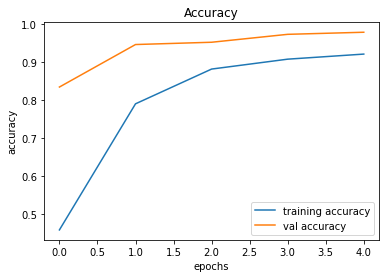

In [17]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

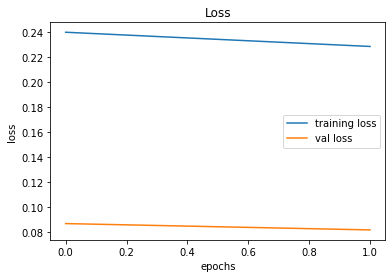

In [27]:
#plotting graphs for loss 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

In [29]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

In [22]:
#Accuracy with the test data
print(accuracy_score(labels, pred))

NameError: name 'accuracy_score' is not defined